<h1>Decision Tree Regression - Financial Stock Price Indication</h1>


<h4> Danayal Khan </h4>


<h4>Importing Libraries</h4>

In [58]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import graphviz
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import ShuffleSplit
from sklearn import tree
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns



Reading data 

In [2]:
df = pd.read_csv(r'C:\Users\danay\OneDrive\Desktop\AUS\Spring20\MachineLearning\FinancialDataProject\200-financial-indicators-of-us-stocks-20142018\2014_Financial_Data.csv', index_col = "Abbrv")
df

,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,R&D Expenses,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,Earnings before Tax,...,Receivables growth,Inventory Growth,Asset Growth,Book Value per Share Growth,Debt Growth,R&D Expense Growth,SG&A Expenses Growth,Sector,2015 PRICE VAR [%],Class
Abbrv,,,,,,,,,,,,,,,,,,,,,
PG,7.440100e+10,-0.0713,3.903000e+10,3.537100e+10,0.0,2.146100e+10,2.146100e+10,1.391000e+10,7.090000e+08,1.449400e+10,...,-0.0187,-0.0217,0.0359,0.0316,0.1228,0.0000,-0.1746,Consumer Defensive,-9.323276,0
VIPS,3.734148e+09,1.1737,2.805625e+09,9.285226e+08,108330319.7,3.441414e+08,7.939267e+08,1.345959e+08,1.214869e+07,1.753823e+08,...,NaN,NaN,NaN,NaN,NaN,1.6484,1.7313,Consumer Defensive,-25.512193,0
KR,9.837500e+10,0.0182,7.813800e+10,2.023700e+10,0.0,1.519600e+10,1.751200e+10,2.725000e+09,4.430000e+08,2.270000e+09,...,0.0618,0.0981,0.1886,0.3268,0.2738,0.0000,0.0234,Consumer Defensive,33.118297,1
RAD,2.552641e+10,0.0053,1.820268e+10,7.323734e+09,0.0,6.561162e+09,6.586482e+09,7.372520e+08,4.245910e+08,2.502180e+08,...,0.0211,-0.0510,-0.0189,0.1963,-0.0458,0.0000,-0.0060,Consumer Defensive,2.752291,1
GIS,1.790960e+10,0.0076,1.153980e+10,6.369800e+09,0.0,3.474300e+09,3.412400e+09,2.957400e+09,3.024000e+08,2.707700e+09,...,0.0257,0.0090,0.0215,0.0274,0.1025,0.0000,-0.0220,Consumer Defensive,12.897715,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TSRI,4.952987e+07,0.1028,4.125164e+07,8.278229e+06,0.0,8.253061e+06,8.253061e+06,2.516800e+04,0.000000e+00,-6.893600e+04,...,-0.0384,0.0000,-0.0041,-0.0049,0.0000,0.0000,0.0213,Technology,29.362884,1
TZOO,1.532400e+08,-0.1019,1.917400e+07,1.340660e+08,11326000.0,1.125130e+08,1.162560e+08,1.781000e+07,0.000000e+00,1.790100e+07,...,0.1529,0.0000,-0.1872,0.1823,0.0000,0.2830,-0.0637,Technology,-31.167763,0
USATP,4.200000e+07,NaN,2.700000e+07,1.500000e+07,NaN,1.400000e+07,1.500000e+07,0.000000e+00,0.000000e+00,0.000000e+00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Technology,-23.558900,0


Applying classifying function to generate the classes that will be used as labels

In [3]:
def classifying(x):
    if x > 1: 
        if x < 10:
            return 1
        if x < 100:
            return 2
        if x < 1000:
            return 3
        if x < 10000:
            return 4
        if x < 100000:
            return 5
        if x > 1000000:
            return 6
    
    else:
        if x > -10:
            return -1
        if x > -100:
            return -2
        if x > -1000:
            return -3
        if x < 1000:
            return -4
        

In [4]:
df["classes"] = df['2015 PRICE VAR [%]'].apply(classifying)


Dropping other labels that allowed us to generate the final "classes" label

In [5]:
df = df.drop(columns=['2015 PRICE VAR [%]','Class', 'Sector'])

In [6]:
df = df.fillna(0)

In [7]:
# # creating initial dataframe
# class_types = ('Class A','Class B','Class C','Class D','Class E','Class F','Class W', 'Class X', 'Class Y', 'Class Z')
# class_df = pd.DataFrame(class_types, columns=['class_types'])
# # creating instance of labelencoder
# labelencoder = LabelEncoder()
# # Assigning numerical values and storing in another column
# class_df['class_types_Cat'] = labelencoder.fit_transform(class_df['class_types'])
# class_df

In [8]:
nparray = df.to_numpy()
nparray

array([[ 7.44010000e+10, -7.13000000e-02,  3.90300000e+10, ...,
         0.00000000e+00, -1.74600000e-01, -1.00000000e+00],
       [ 3.73414805e+09,  1.17370000e+00,  2.80562544e+09, ...,
         1.64840000e+00,  1.73130000e+00, -2.00000000e+00],
       [ 9.83750000e+10,  1.82000000e-02,  7.81380000e+10, ...,
         0.00000000e+00,  2.34000000e-02,  2.00000000e+00],
       ...,
       [ 4.20000000e+07,  0.00000000e+00,  2.70000000e+07, ...,
         0.00000000e+00,  0.00000000e+00, -2.00000000e+00],
       [ 3.40758000e+08,  1.34400000e-01,  3.15948000e+08, ...,
         0.00000000e+00,  6.50000000e-02,  1.00000000e+00],
       [ 4.03373680e+07,  1.92500000e-01,  2.12936750e+07, ...,
         2.77800000e-01, -2.68000000e-02, -2.00000000e+00]])

Splitting the data into features and labels

In [9]:
features = nparray[:,0:-1]
label = nparray[:,-1]

Splitting matrices into random train and test subsets n number of times to ensure there is no single random split bias

In [10]:
for i in range (100):
    X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.2, random_state=42)


In [11]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(3046, 221)
(762, 221)
(3046,)
(762,)


In [99]:
clf_1 = DecisionTreeClassifier(max_depth=1000, min_samples_split = 100, min_samples_leaf = 100, max_leaf_nodes = 990)


clf_1.fit(X_train, y_train)


# Predict
y_1 = clf_1.predict(X_test)


tree_para = {'criterion':['gini','entropy'],'max_leaf_nodes':[4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150], 'max_depth':[5,10,15,20,30,40,50,60]}
clf_4 = GridSearchCV(DecisionTreeClassifier(), tree_para, cv=5, return_train_score = True, n_jobs = -1)
clf_4.fit(X_train, y_train)




C:\Users\danay\Anaconda3\envs\deeplearning\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                     

In [92]:
print("Train accuracy for clf_1 is: ", clf_1.score(X_train, y_train))

print("Train accuracy for clf_4 is: ", clf_4.score(X_train, y_train))


print('Test accuracy for clf_4 is: ', clf_1.score(X_test, y_test))

print('Test accuracy is for clf_4 is: ', clf_4.score(X_test, y_test))


Train accuracy for clf_1 is:  0.5052527905449771
Train accuracy for clf_4 is:  0.4927774130006566
Test accuracy for clf_4 is:  0.4540682414698163
Test accuracy is for clf_4 is:  0.463254593175853


In [100]:
results = clf_4.cv_results_


df2 = pd.DataFrame.from_dict(results)

In [101]:
df2["rank_test_score"].sort_values(ascending = False)

107    288
143    287
71     286
125    285
89     284
      ... 
26       3
62       3
80       3
8        2
5        1
Name: rank_test_score, Length: 288, dtype: int32

In [102]:
df2.head(6)



,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_max_leaf_nodes,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.227186,0.019087,0.001004,0.001546,gini,5,4,"{'criterion': 'gini', 'max_depth': 5, 'max_lea...",0.473770,0.479475,...,0.469138,0.010538,41,0.472085,0.478047,0.484612,0.492409,0.486664,0.482763,0.007042
1,0.248568,0.030163,0.001596,0.001954,gini,5,5,"{'criterion': 'gini', 'max_depth': 5, 'max_lea...",0.470492,0.479475,...,0.467169,0.012743,112,0.479064,0.478047,0.485433,0.492409,0.486664,0.484323,0.005275
2,0.276584,0.026383,0.001107,0.001566,gini,5,6,"{'criterion': 'gini', 'max_depth': 5, 'max_lea...",0.450820,0.484401,...,0.467504,0.017061,81,0.489327,0.483381,0.485433,0.492409,0.491178,0.488345,0.003424
3,0.270894,0.032746,0.001808,0.001601,gini,5,7,"{'criterion': 'gini', 'max_depth': 5, 'max_lea...",0.450820,0.484401,...,0.469474,0.017503,25,0.489327,0.483381,0.492409,0.492409,0.501026,0.491710,0.005706
4,0.295804,0.038135,0.000000,0.000000,gini,5,8,"{'criterion': 'gini', 'max_depth': 5, 'max_lea...",0.439344,0.484401,...,0.466194,0.019598,136,0.499179,0.483381,0.494460,0.496102,0.501026,0.494830,0.006167
5,0.290362,0.027073,0.000000,0.000000,gini,5,9,"{'criterion': 'gini', 'max_depth': 5, 'max_lea...",0.439344,0.484401,...,0.471448,0.018341,1,0.503284,0.487074,0.503488,0.504309,0.501026,0.499836,0.006473


From the above table, we can see that the best pefromance was achieved by the fourth split when using the values 5 for maximum depth and 9 for maximum leaf nodes. This will be used at the end of the notebook to plot the decision tree.

The followig is data preparation to plot the top results against their test scores. 

In [103]:
topranks = df2['rank_test_score'] <10

df3 = df2[topranks]

df4 = df3[['param_max_depth', 'param_max_leaf_nodes', 'mean_test_score', 'mean_train_score']]

pd.set_option('mode.chained_assignment', None)

df4['depth_leafnodes']=df4['param_max_depth'].astype(str)+'_'+df4['param_max_leaf_nodes'].astype(str)

df4

,param_max_depth,param_max_leaf_nodes,mean_test_score,mean_train_score,depth_leafnodes
5,5,9,0.471448,0.499836,5_9
8,5,12,0.470464,0.508043,5_12
26,10,12,0.469807,0.508043,10_12
44,15,12,0.469807,0.508043,15_12
62,20,12,0.469807,0.508043,20_12
80,30,12,0.469807,0.508043,30_12
98,40,12,0.469807,0.508043,40_12
116,50,12,0.469807,0.508043,50_12
134,60,12,0.469807,0.508043,60_12


The following is a plot that shows the top ten results from the gridsearch. On the x axis, the maximum depth and the maximum leaf nodes are labelled such as "maxdepth_maxleafnodes" and the test score is labelled on the y-axis

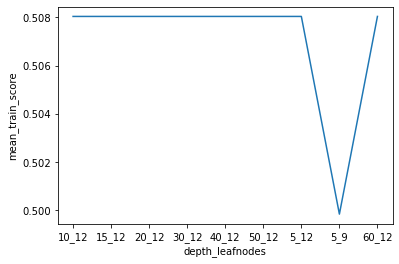

In [104]:
ax = sns.lineplot(x="depth_leafnodes", y="mean_train_score", data=df4)

The above graph may indicate the training accuracy for the chosen paramters is the lowest by far, however the difference is only 0.008 since the values on the y-axis have a very small range themselves

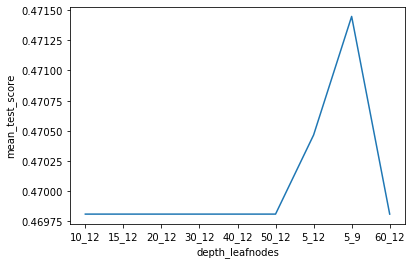

In [106]:
ax = sns.lineplot(x="depth_leafnodes", y="mean_test_score", data=df4)

Training accuracy is:  0.4927774130006566
Predicion accuracy is:  0.463254593175853


[Text(167.4, 195.696, 'X[125] <= 0.459\ngini = 0.694\nsamples = 3046\nvalue = [1354, 434, 1, 365, 824, 53, 7, 7, 1]'),
 Text(83.7, 152.208, 'X[157] <= 0.0\ngini = 0.632\nsamples = 1598\nvalue = [868, 185, 0, 136, 362, 35, 4, 7, 1]'),
 Text(41.85, 108.72, 'X[47] <= 10810495488.0\ngini = 0.727\nsamples = 362\nvalue = [139, 59, 0, 63, 95, 3, 0, 2, 1]'),
 Text(20.925, 65.232, 'gini = 0.739\nsamples = 331\nvalue = [114, 58, 0, 60, 93, 3, 0, 2, 1]'),
 Text(62.775000000000006, 65.232, 'gini = 0.335\nsamples = 31\nvalue = [25, 1, 0, 3, 2, 0, 0, 0, 0]'),
 Text(125.55000000000001, 108.72, 'X[101] <= 2.751\ngini = 0.591\nsamples = 1236\nvalue = [729, 126, 0, 73, 267, 32, 4, 5, 0]'),
 Text(104.625, 65.232, 'gini = 0.546\nsamples = 767\nvalue = [490, 64, 0, 34, 145, 28, 3, 3, 0]'),
 Text(146.475, 65.232, 'gini = 0.648\nsamples = 469\nvalue = [239, 62, 0, 39, 122, 4, 1, 2, 0]'),
 Text(251.10000000000002, 152.208, 'X[50] <= 238436000.0\ngini = 0.731\nsamples = 1448\nvalue = [486, 249, 1, 229, 462, 18

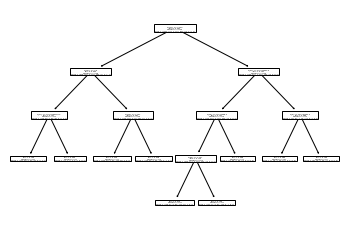

In [107]:
clf_final = DecisionTreeClassifier(max_depth=5, max_leaf_nodes = 9)

clf_final.fit(X_train, y_train)

print('Training accuracy is: ', clf_final.score(X_train, y_train))


print('Predicion accuracy is: ', clf_final.score(X_test, y_test))

tree.plot_tree(clf_final)



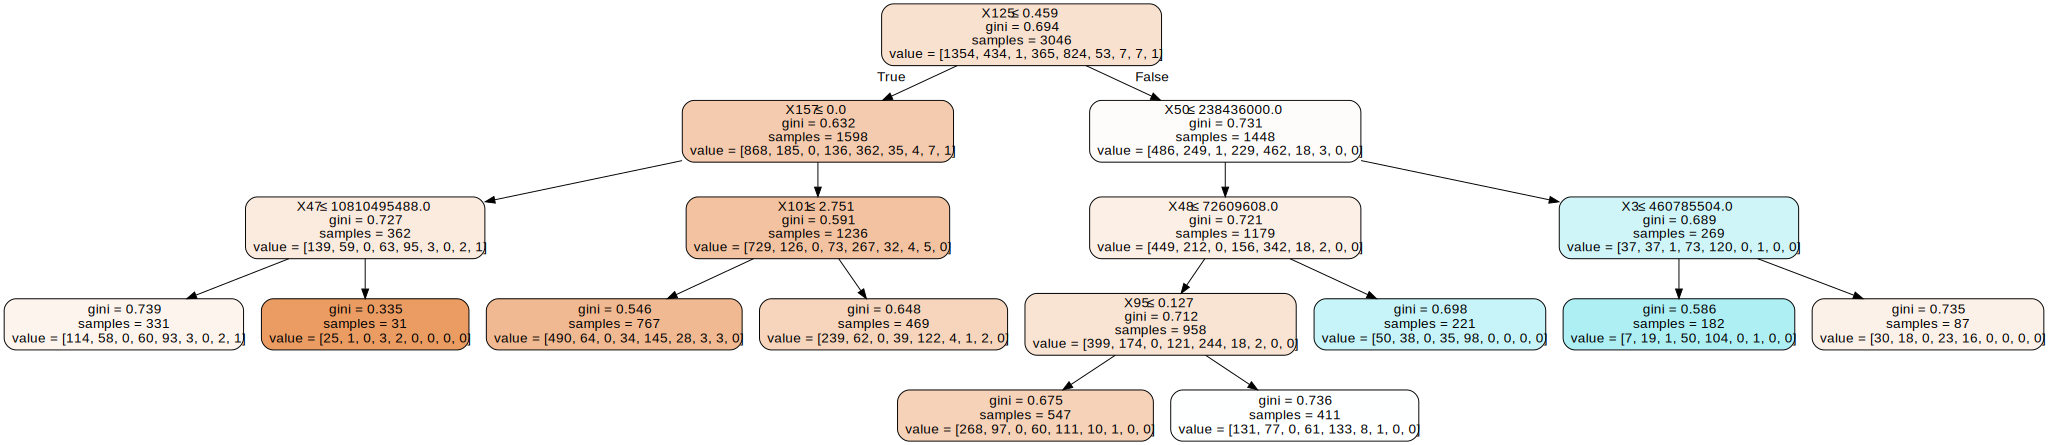

In [119]:
dot_data = tree.export_graphviz(clf_final, out_file=None, 
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

The method to finding the best accuracy from decision tree classification was to use a Grid Search approach. The grid search approach allows the user to input values for different paramters to be tested. Then, the algorithm fits the model using all combinations of the paramters provided and chooses the paramters according to the accuracy. The training and testing accuracy was plotted against the different paramters used by the GridSearchCV approach. The accuracy achieved was only 0.463254593175853 and perhaps using another machine learning approach would increase the accuracy of our results. The data was cleaned with the help of Kernals uploaded on Kaggle of the dataset. This is essential since machine learning algorithms require data to be of a certain type to work efficiently.